In [1]:
import tensorflow as tf
import cv2
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
from glob import glob

In [3]:
import cv2
width,height=224,224
img=cv2.imread('/content/drive/MyDrive/Dataset/Train/jeans_train/jeans0.jpg')
img_resized = cv2.resize(img,(width, height))

In [4]:
img_resized.shape

(224, 224, 3)

(320, 154, 3)


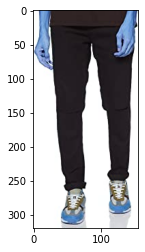

In [5]:
print(img.shape)
plt.imshow(img)

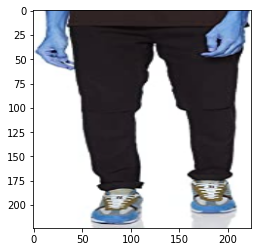

In [6]:
plt.imshow(img_resized)

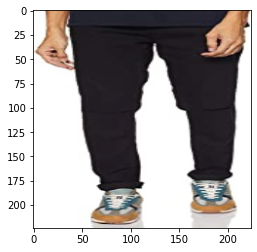

In [7]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

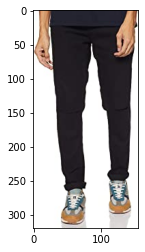

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 612 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 232 images belonging to 3 classes.


In [13]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')
  

# our layerst
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [14]:
folders

['/content/drive/MyDrive/Dataset/Train/jeans_train',
 '/content/drive/MyDrive/Dataset/Train/sarees_train',
 '/content/drive/MyDrive/Dataset/Train/trousers_train']

In [15]:
# fit the model
r = model.fit_generator( training_set,validation_data=test_set,epochs=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
20/20 [==============================] - 262s 13s/step - loss: 0.7038 - accuracy: 0.7141 - val_loss: 0.5606 - val_accuracy: 0.7716
Epoch 2/2
20/20 [==============================] - 237s 12s/step - loss: 0.1851 - accuracy: 0.9216 - val_loss: 0.1093 - val_accuracy: 0.9440


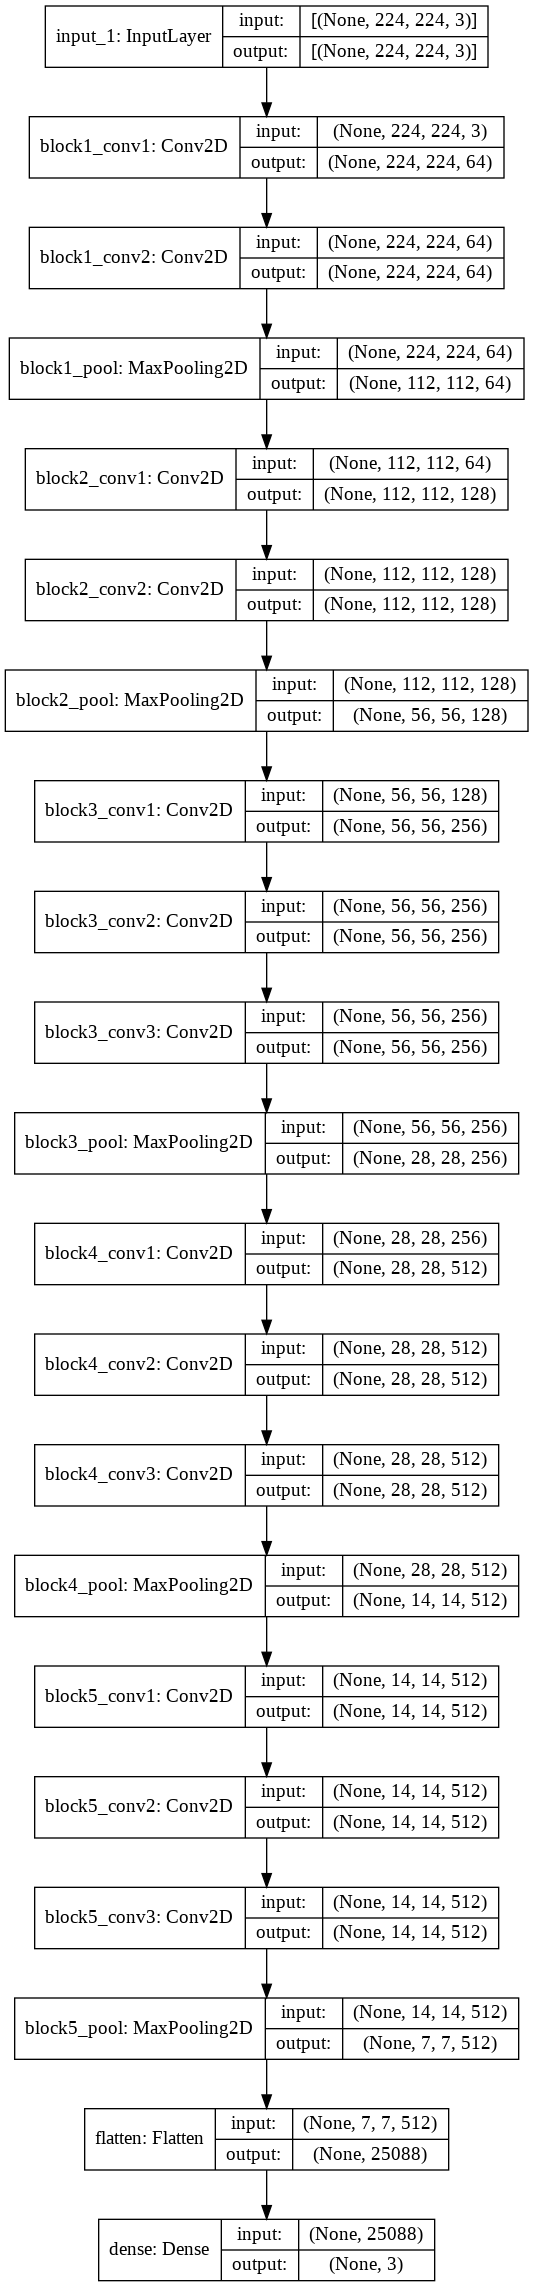

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)